In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as pp
import math
from matplotlib.pyplot import figure


In [86]:
# Reading CSV File and storing each individual column as arrays
df = pd.read_csv("justiceCentered1.csv", encoding= 'unicode_escape')
df1 = pd.read_csv("justice_dict.csv")
issueArea = df["issueArea"]
justice = df["justice"]
justiceName = df1["justice"]
vote = df["vote"]
direction = df["direction"]

print(justiceName)
# 102 - 117

# parsedData = pd.DataFrame({'justice': justice})
# parsedData.to_csv("justice_dict.csv")
# parsedData

0           H. Black
1            S. Reed
2     F. Frankfurter
3         W. Douglas
4          F. Murphy
5          J. Byrnes
6         R. Jackson
7        W. Rutledge
8          H. Burton
9          F. Vinson
10          T. Clark
11         S. Minton
12         E. Warren
13         J. Harlan
14        W. Brennan
15      C. Whittaker
16        P. Stewart
17          B. White
18       A. Goldberg
19         A. Fortas
20       T. Marshall
21         W. Burger
22       H. Blackmun
23         L. Powell
24      W. Rehnquist
25        J. Stevens
26       S. O'Connor
27         A. Scalia
28        A. Kennedy
29         D. Souter
30         C. Thomas
31       RB Ginsburg
32         S. Breyer
33        J. Roberts
34          S. Alito
35      S. Sotomayor
36          E. Kagan
37        N. Corsuch
38      B. Kavanaugh
39        AC Barrett
Name: justice, dtype: object


In [87]:
# Creating a new dataframe based only on justice and direction
dataset = pd.DataFrame({'justice': justice, 'direction': direction})
print(dataset)
justiceLeanings = []

# Find the average of each justice's votes - [1,2] where 1 is more conservative and 2 is more liberal
for area in range(1, 15):
    issueAreaLeanings = [] # issueAreaLeanings is the list for each issueArea
    dataset = pd.DataFrame({'justice': justice[issueArea == area], 'direction': direction[issueArea == area]})
    for i in range(78, 118):
        issueAreaLeanings.append(np.mean(dataset[dataset['justice'] == i])) # Adding each justice's mean leaning score to the issueAreaLeanings
    justiceLeanings.append(issueAreaLeanings)



       justice  direction
0           86        1.0
1           84        2.0
2           81        2.0
3           80        2.0
4           79        2.0
...        ...        ...
81425      113        2.0
81426      114        2.0
81427      115        1.0
81428      116        2.0
81429      117        2.0

[81430 rows x 2 columns]


In [88]:
# Initialize empty numpy arrays for the x-axis(justiceLabels) and the y-axis(justiceData)
arraySize = len(justiceLeanings[0]) 
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Initialize both arrays with the average values calculated in the cell prior
for i in range (0, 40):
    if (justiceLeanings[0][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[0][i]["direction"] # y axis
        justiceLabels[i] = justiceLeanings[0][i]["justice"] # x axis

# Perform a k-means clustering with 3 clusters (Chose 3 based on elbow method in cell below)

justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceLabels)
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)


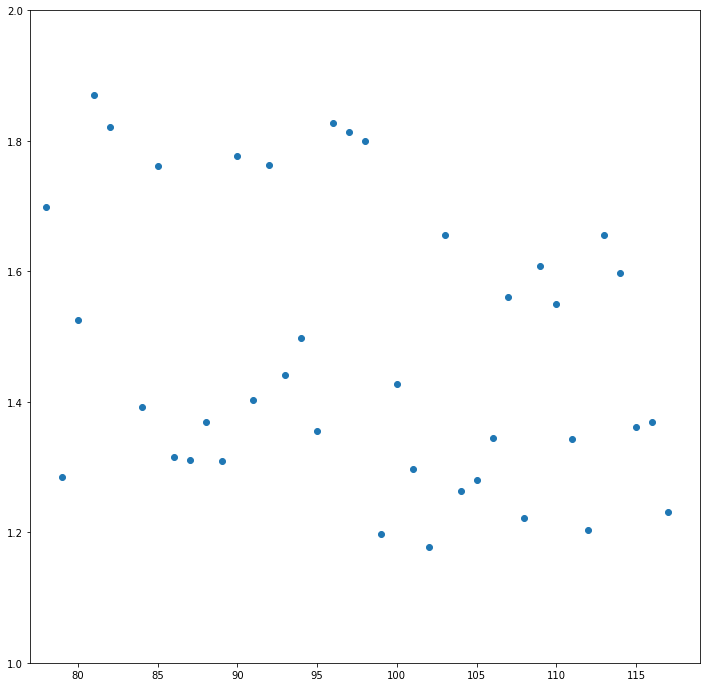

In [89]:
# Plotting unclustered data
plt.figure(figsize=(12,12))
x = plt.subplot()
x.scatter(justiceLabels, justiceData)
plt.xlim(77, 119)
plt.ylim(1, 2)
plt.show()

<Figure size 432x288 with 0 Axes>

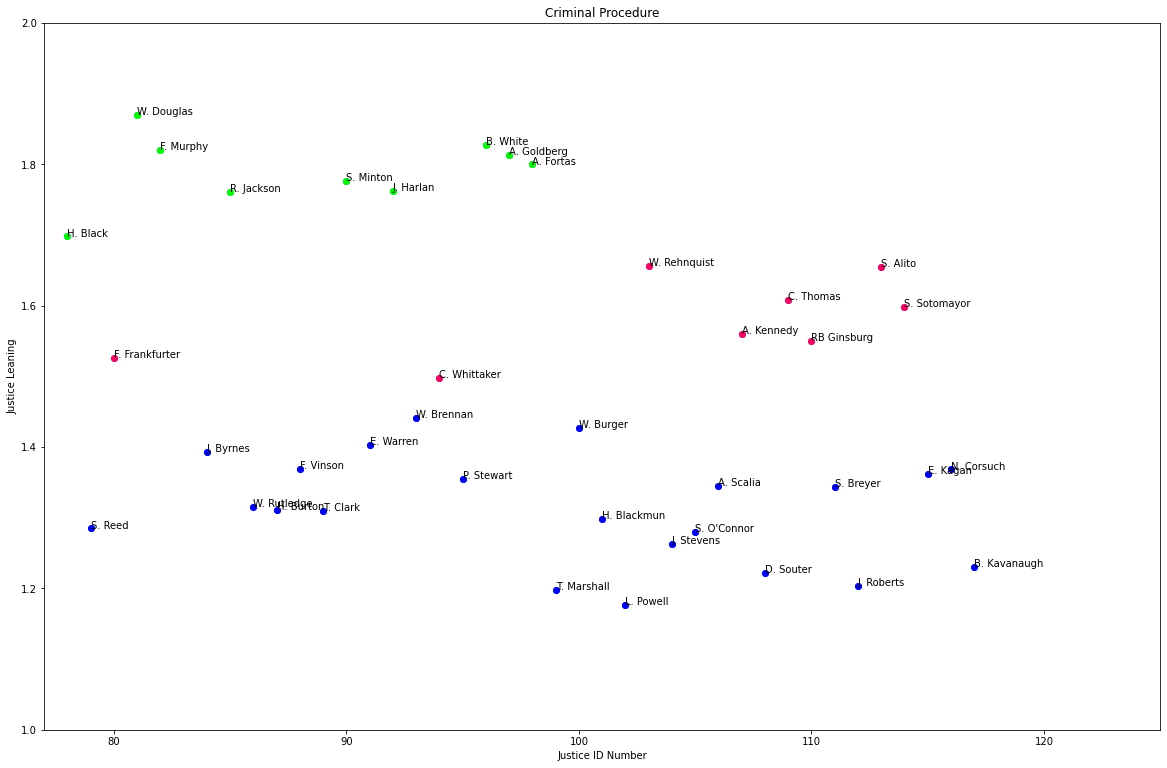

In [101]:
# Adding colors to the clustered data to show the clusters
colors=["#0000FF", "#00FF00", "#FF0066", "#FF8000"]
fig = plt.figure()
plt.figure(figsize=(20,13))
x = plt.subplot()
x.scatter(justiceLabels, justiceData)
plt.xlim(77, 125)
plt.ylim(1, 2)
plt.xlabel("Justice ID Number")
plt.ylabel("Justice Leaning")
plt.title("Criminal Procedure")
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])

for i in range(arraySize):
  x.annotate(justiceName[i], xy = (justiceLabels[i], justiceData[i]))
plt.show()

In [102]:
# Elbow Method to find out the optimal number of clusters for this issue area
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

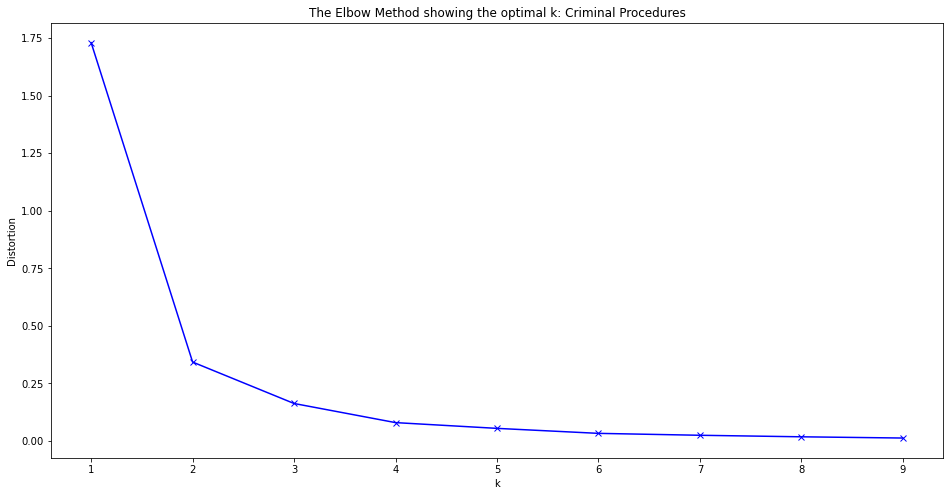

In [103]:
# Plotting elbow graph and subsequent analysis
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Criminal Procedures')
plt.show()


<Figure size 432x288 with 0 Axes>

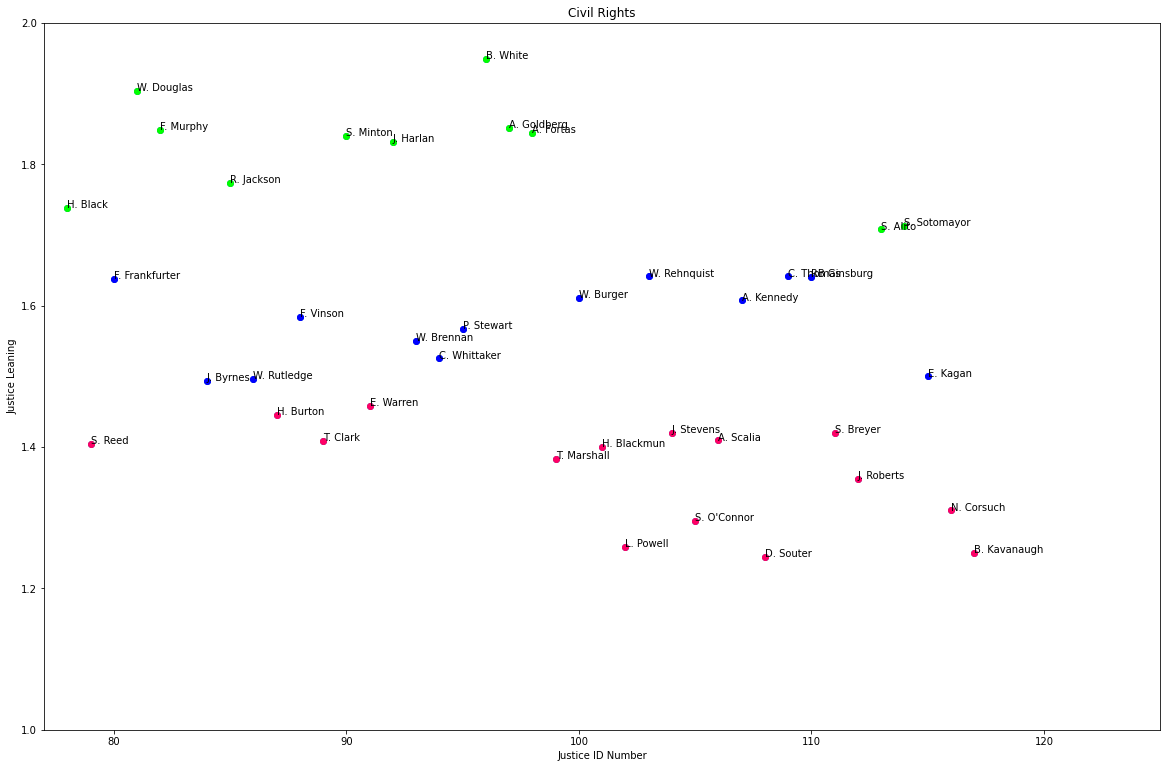

In [108]:
# Issue Area 2: Civil Rights

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[1])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[1][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[1][i]["direction"]
        justiceLabels[i] = justiceLeanings[1][i]["justice"]

justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066", "#FF8000"]
fig = plt.figure()
plt.figure(figsize=(20,13))
x = plt.subplot()
x.scatter(justiceLabels, justiceData)
plt.xlim(77, 125)
plt.ylim(1, 2)
plt.xlabel("Justice ID Number")
plt.ylabel("Justice Leaning")
plt.title("Civil Rights")

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.ylim(1, 2)
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])

for i in range(arraySize):
  x.annotate(justiceName[i], xy = (justiceLabels[i], justiceData[i]))
plt.show()

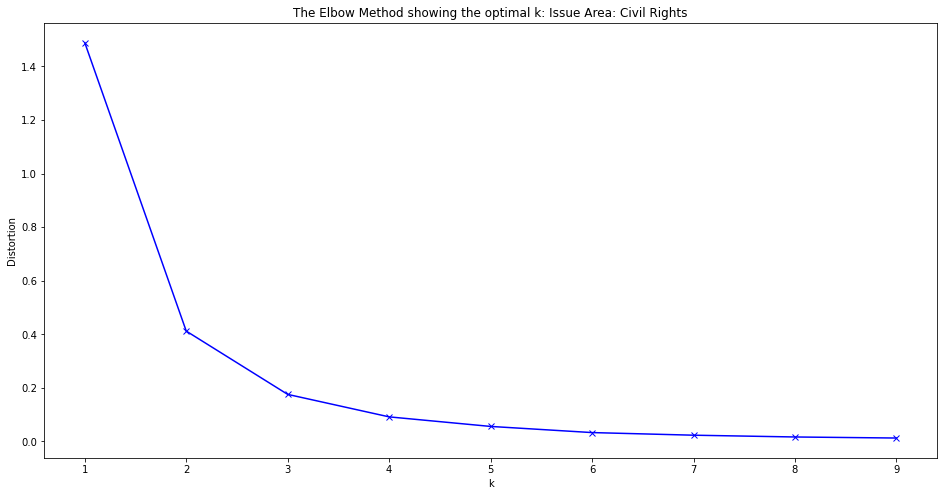

In [42]:
# Elbow Method for Issue 2: Civil Rights
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Civil Rights')
plt.show()

<Figure size 432x288 with 0 Axes>

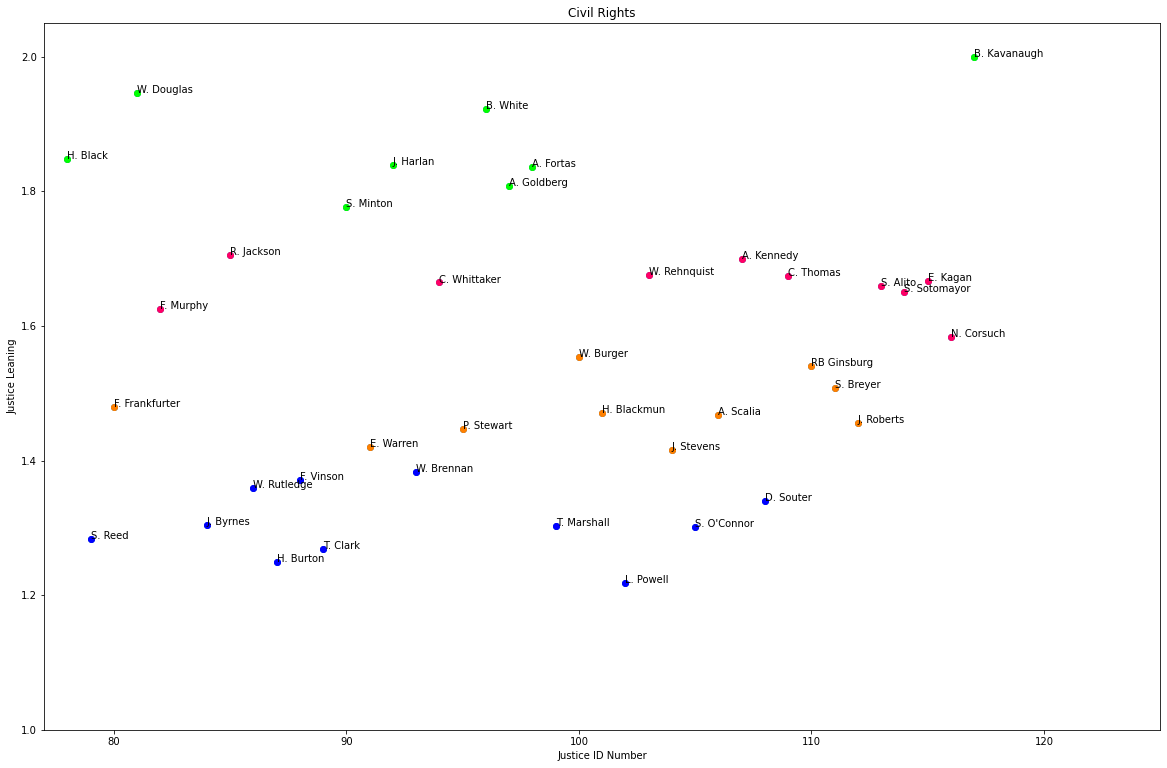

In [111]:
# Issue Area 3: First Amendment

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[2])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[2][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[2][i]["direction"]
        justiceLabels[i] = justiceLeanings[2][i]["justice"]


justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=4)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

plt.figure(figsize=(20,13))
x = plt.subplot()
x.scatter(justiceLabels, justiceData)
plt.xlim(77, 125)
plt.ylim(1, 2.05)
plt.xlabel("Justice ID Number")
plt.ylabel("Justice Leaning")
plt.title("Civil Rights")

# Plotting the scatter plot of justiceData vs justiceLabels with colors
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])

for i in range(arraySize):
  x.annotate(justiceName[i], xy = (justiceLabels[i], justiceData[i]))
plt.show()

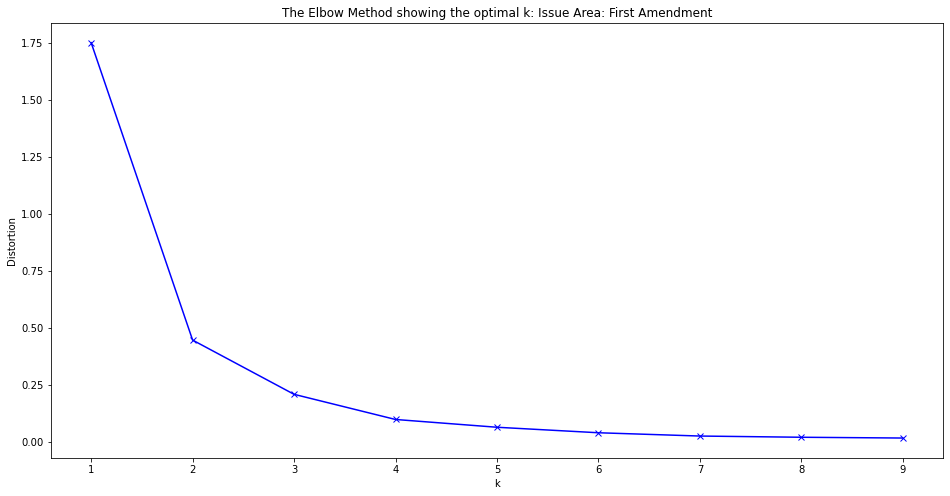

In [47]:
# Elbow Method for Issue 3: First Amendment; optimal clusters: 4
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: First Amendment')
plt.show()

<Figure size 432x288 with 0 Axes>

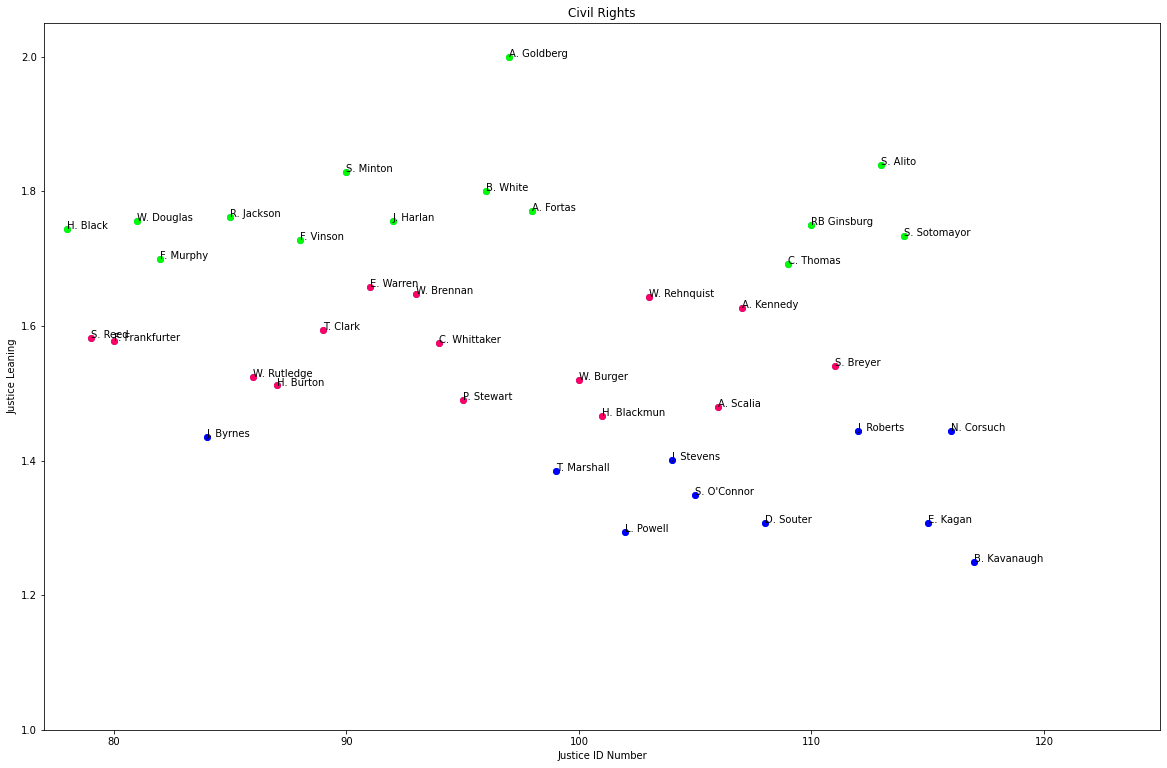

In [113]:
# Issue Area 4: Due Process

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[3])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[3][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[3][i]["direction"]
        justiceLabels[i] = justiceLeanings[3][i]["justice"]


justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()
plt.figure(figsize=(20,13))
x = plt.subplot()
x.scatter(justiceLabels, justiceData)
plt.xlim(77, 125)
plt.ylim(1, 2.05)
plt.xlabel("Justice ID Number")
plt.ylabel("Justice Leaning")
plt.title("Civil Rights")

# Plotting the scatter plot of justiceData vs justiceLabels with colors
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])

for i in range(arraySize):
  x.annotate(justiceName[i], xy = (justiceLabels[i], justiceData[i]))
plt.show()

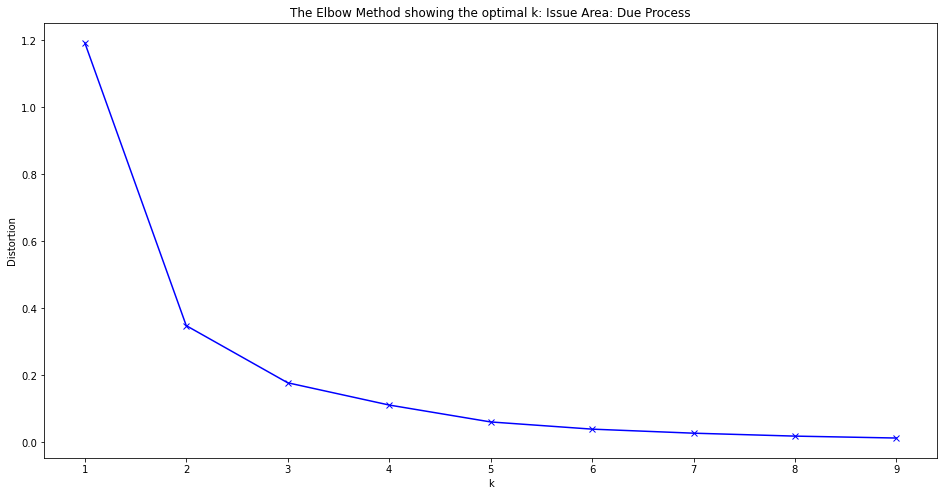

In [50]:
# Elbow Method for Issue 4: Due Process; optimal clusters: 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Due Process')
plt.show()

<Figure size 432x288 with 0 Axes>

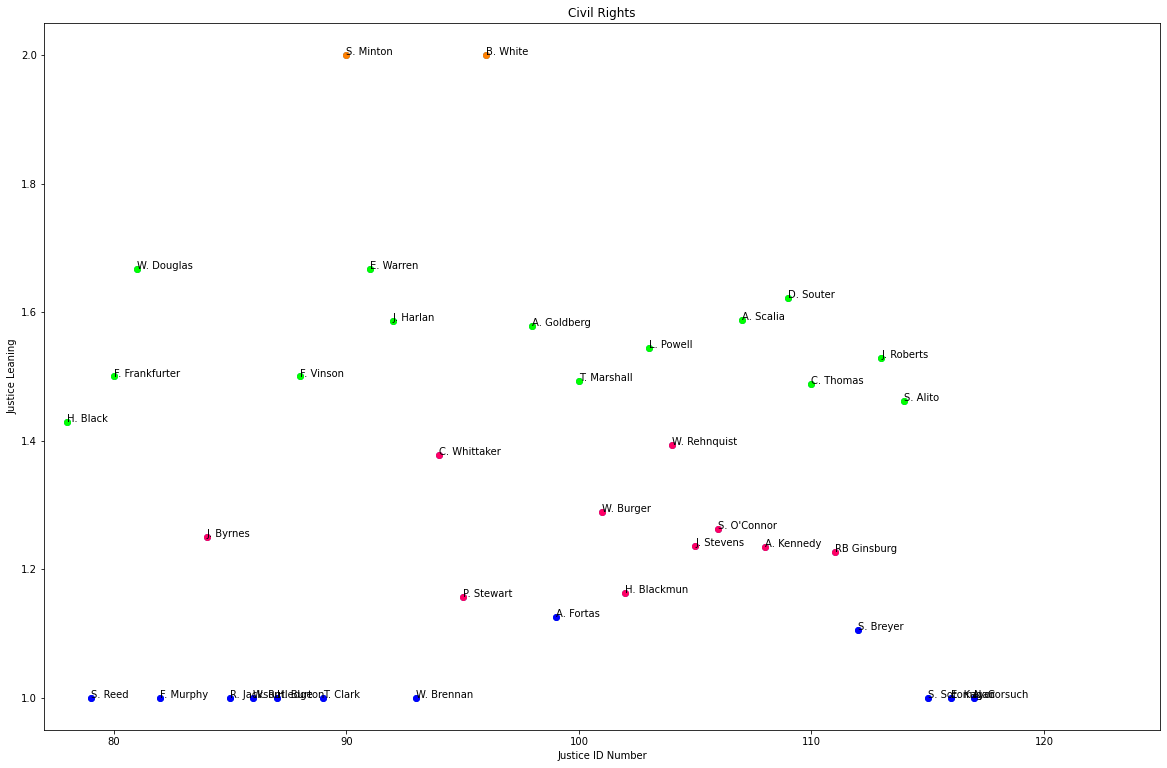

In [115]:
# Issue Area 5: Privacy -> 3 clusters

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[4])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[4][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[4][i]["direction"]
        justiceLabels[i] = justiceLeanings[4][i]["justice"]


justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=4)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

plt.figure(figsize=(20,13))
x = plt.subplot()
x.scatter(justiceLabels, justiceData)
plt.xlim(77, 125)
plt.ylim(0.95, 2.05)
plt.xlabel("Justice ID Number")
plt.ylabel("Justice Leaning")
plt.title("Civil Rights")

# Plotting the scatter plot of justiceData vs justiceLabels with colors
for i in range(arraySize):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])

for i in range(arraySize):
  x.annotate(justiceName[i], xy = (justiceLabels[i], justiceData[i]))
plt.show()

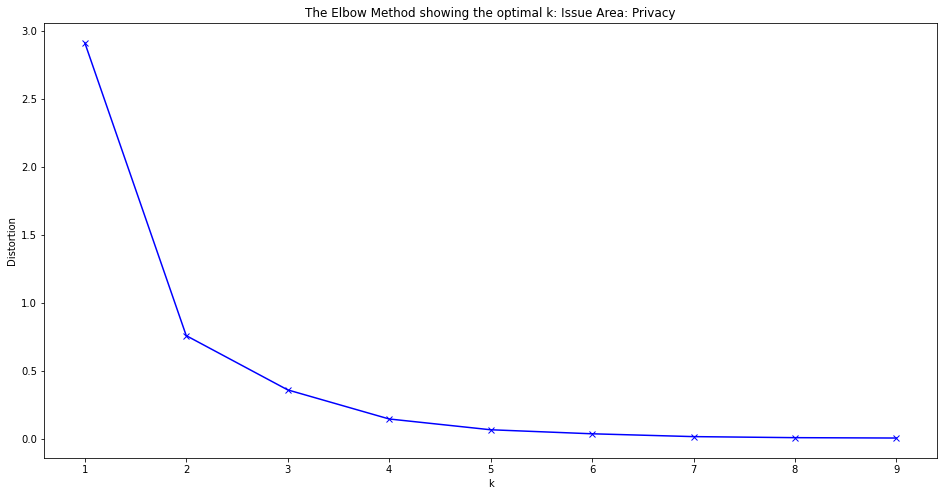

In [57]:
# Elbow Method for Issue 5: Privacy
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Privacy')
plt.show()

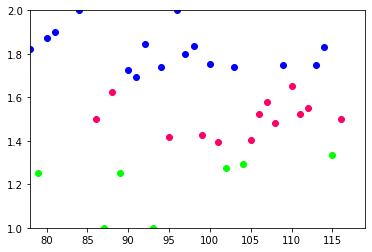

In [60]:
# Issue Area 6: Attorneys

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[5])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[5][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[5][i]["direction"]
        justiceLabels[i] = justiceLeanings[5][i]["justice"]

# Removing nan values from array (corresponds to justices who have never voted on this issue area)
justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()



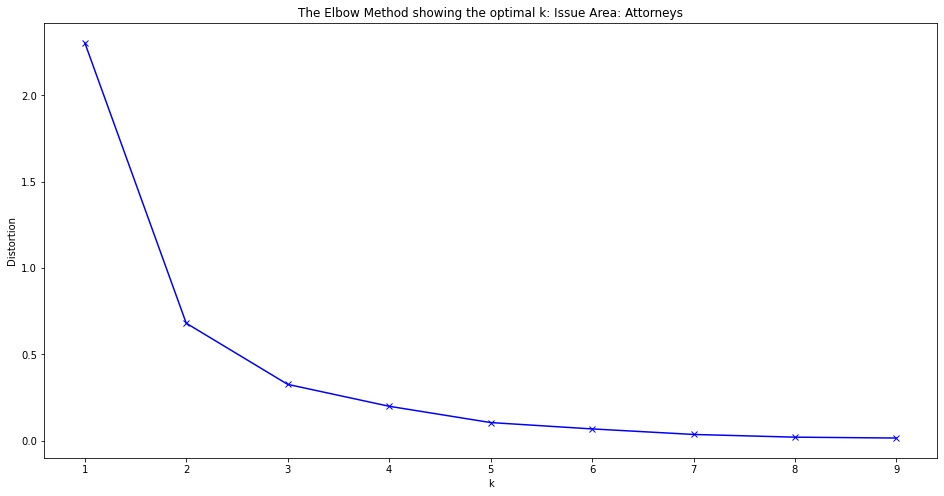

In [61]:
# Elbow Method for Issue 6: Attorneys - ideal is 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)
# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Attorneys')
plt.show()

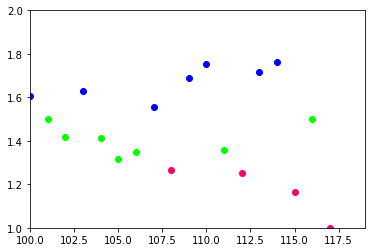

In [64]:
# Issue Area 7: Unions

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[6])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[6][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[6][i]["direction"]
        justiceLabels[i] = justiceLeanings[6][i]["justice"]


justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(100, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

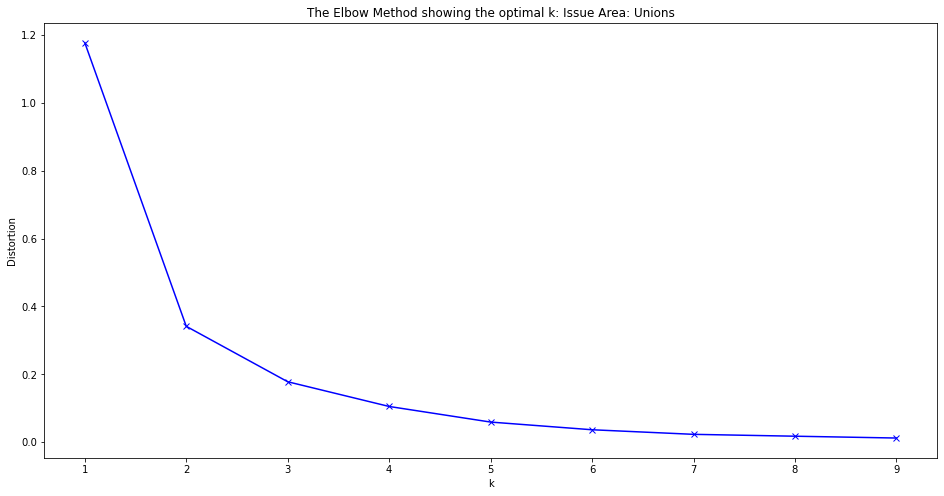

In [65]:
# Elbow Method for Issue 7: Unions - ideal is 2
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Unions')
plt.show()

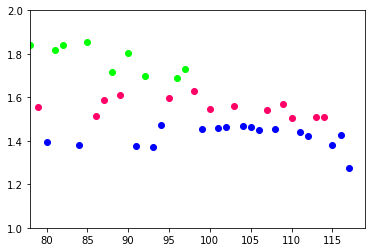

In [67]:
# Issue Area 8: Economic Activity

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[7])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[7][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[7][i]["direction"]
        justiceLabels[i] = justiceLeanings[7][i]["justice"]


justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

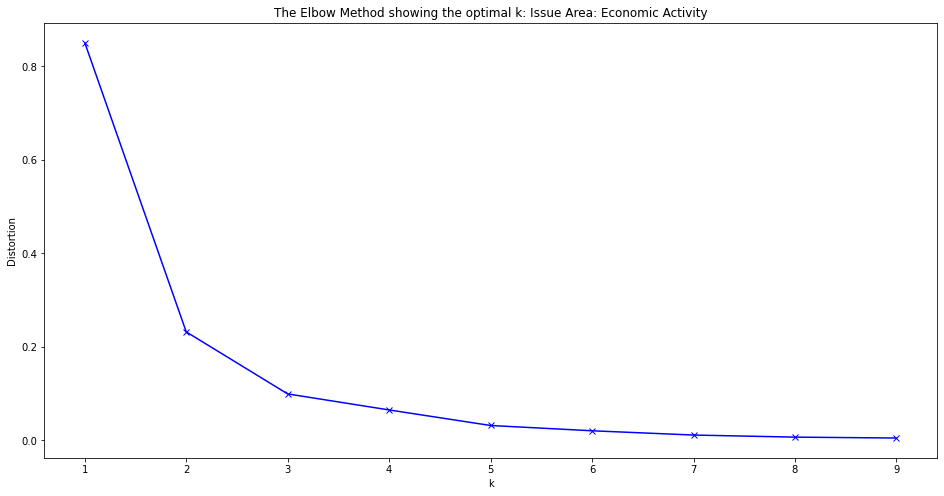

In [68]:
# Elbow Method for Issue 8: Economic Activity - ideal is 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Economic Activity')
plt.show()

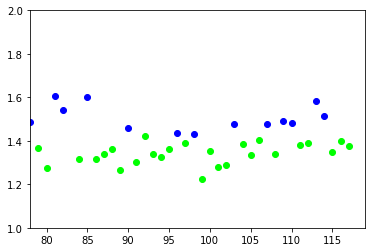

In [70]:
# Issue Area 9: Judicial Power

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[8])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[8][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[8][i]["direction"]
        justiceLabels[i] = justiceLeanings[8][i]["justice"]

justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=2)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

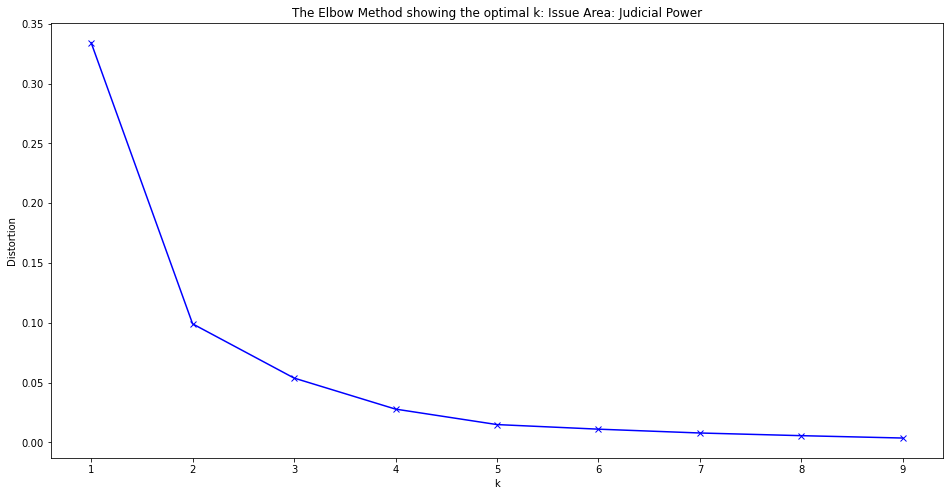

In [71]:
# Elbow Method for Issue 8: Judicial Power - ideal is 2
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Judicial Power')
plt.show()

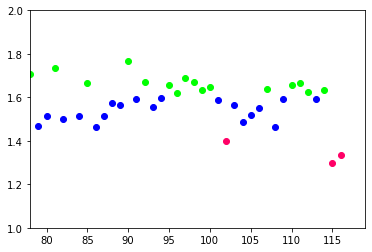

In [75]:
# Issue Area 10: Federalism

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[9])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[9][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[9][i]["direction"]
        justiceLabels[i] = justiceLeanings[9][i]["justice"]


justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

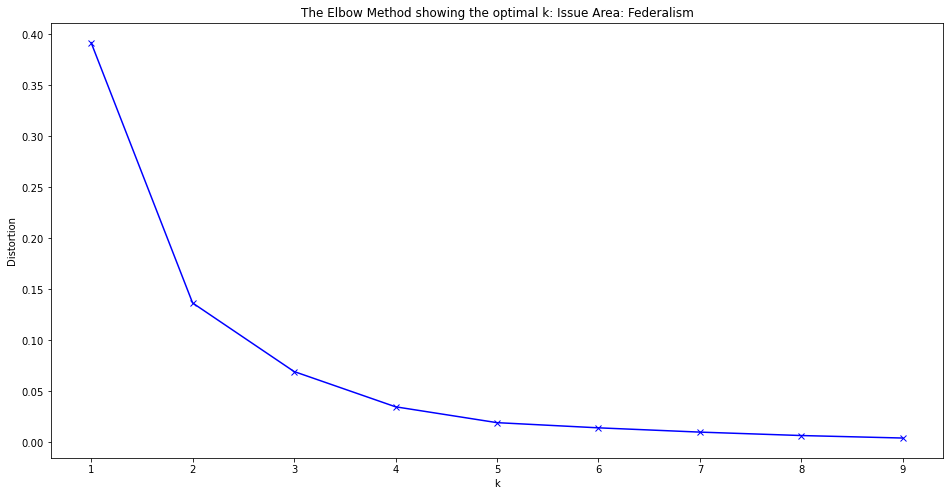

In [76]:
# Elbow Method for Issue 10: Federalism - ideal is 2
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Federalism')
plt.show()

In [82]:
# Issue Area 11: Interstate Relations

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[10])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[10][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[10][i]["direction"]
        justiceLabels[i] = justiceLeanings[10][i]["justice"]

print (justiceData)
# NO DATA FOR THIS ISSUE AREA



[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


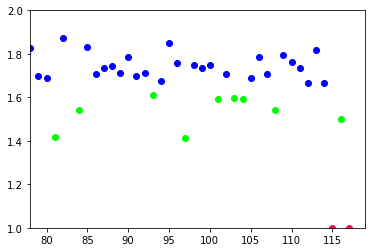

In [83]:
# Issue Area 12: Federal Taxation

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[11])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[11][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[11][i]["direction"]
        justiceLabels[i] = justiceLeanings[11][i]["justice"]

justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

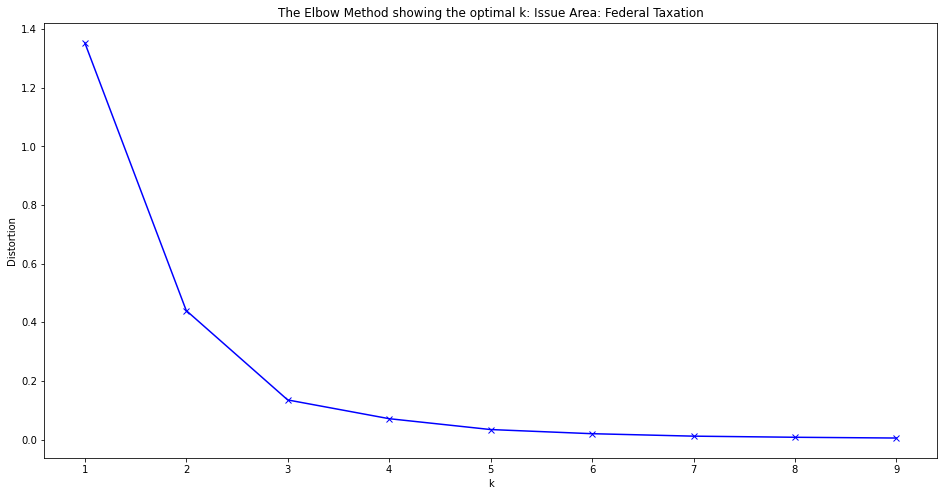

In [84]:
# Elbow Method for Issue 12: Federal Taxation - ideal is 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Federal Taxation')
plt.show()

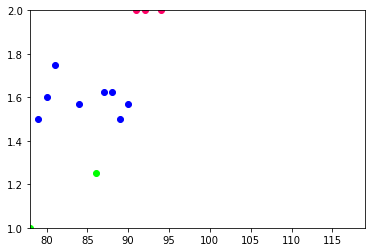

In [85]:
# Issue Area 13: Miscellaneous

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[12])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[12][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[12][i]["direction"]
        justiceLabels[i] = justiceLeanings[12][i]["justice"]

justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)
# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

/var/folders/mt/mm6y21x90373ls9c7q3197nw0000gn/T/ipykernel_1885/343441993.py:6: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeanModel.fit(justiceData)


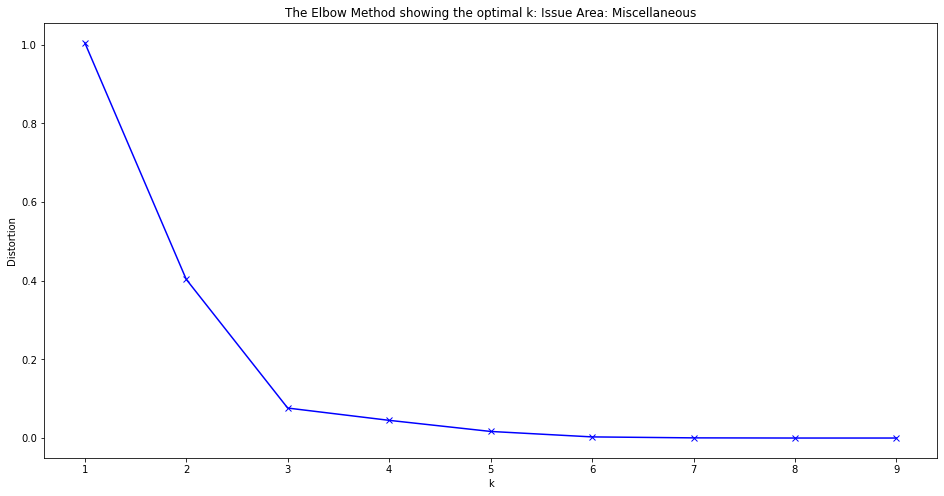

In [86]:
# Elbow Method for Issue 13: Miscellaneous - ideal is 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Miscellaneous')
plt.show()

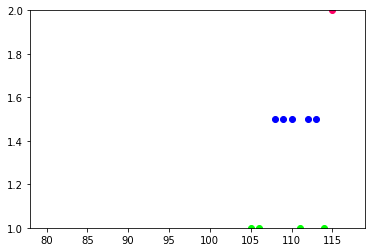

In [91]:
# Issue Area 14: Private Action

# Initializing empty arrays for justiceData and justiceLabels to graph later
arraySize = len(justiceLeanings[13])
justiceData = np.zeros((arraySize, 1))
justiceLabels = np.zeros((arraySize, 1))

# Adding data to arrays
for i in range (0, 40):
    if (justiceLeanings[13][i]["direction"] == [0.0]):
        continue
    else:
        justiceData[i] = justiceLeanings[13][i]["direction"]
        justiceLabels[i] = justiceLeanings[13][i]["justice"]

justiceData = justiceData[~np.isnan(justiceData).any(axis=1)]
justiceLabels = justiceLabels[~np.isnan(justiceLabels).any(axis=1)]
arraySize = len(justiceData)

# Performing clustering through kmeans
kmeanModel = KMeans(n_clusters=3)
label = kmeanModel.fit_predict(justiceData)

# Adding colors to the scatter plot to label each dot
colors=["#0000FF", "#00FF00", "#FF0066","#FF8000" ]
fig = plt.figure()

# Plotting the scatter plot of justiceData vs justiceLabels with colors
plt.xlim(78, 119)
plt.ylim(1, 2)
for i in range(len(justiceData)):
    plt.scatter(justiceLabels[i], justiceData[i], color = colors[label[i]])
plt.show()

/var/folders/mt/mm6y21x90373ls9c7q3197nw0000gn/T/ipykernel_1885/1195398260.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeanModel.fit(justiceData)
/var/folders/mt/mm6y21x90373ls9c7q3197nw0000gn/T/ipykernel_1885/1195398260.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeanModel.fit(justiceData)
/var/folders/mt/mm6y21x90373ls9c7q3197nw0000gn/T/ipykernel_1885/1195398260.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeanModel.fit(justiceData)
/var/folders/mt/mm6y21x90373ls9c7q3197nw0000gn/T/ipykernel_1885/1195398260.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeanModel.fit(justiceData)
/var/folders/mt/mm6y21x90373ls9c7q3197nw0000gn/T/ipy

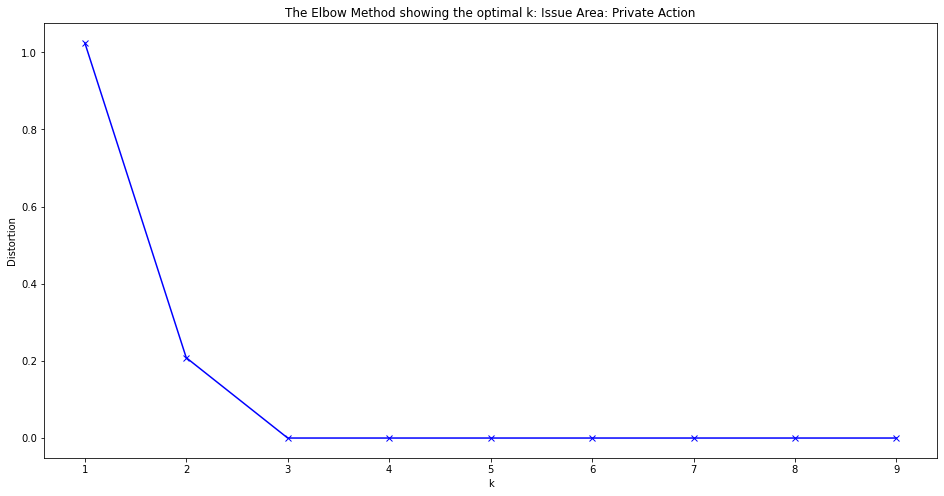

In [92]:
# Elbow Method for Issue 14: Private Action - ideal is 3
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(justiceData)
    optimal.append(kmeanModel.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Issue Area: Private Action')
plt.show()

In [ ]:
# Creating a csv file with justice Index and justice Names to be used as a dictionary in our main classify.py
